### PROJETO ÁREA FINACEIRA
## OBJETIVO: PREVER O VALOR DAS AÇÕES DA EMPRESA AUTO HAUL
### dados encontrados do kaggle.com dataset com valores reais

In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Remover warnings do ambiente Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')

# Configuração opcional para gráficos do Matplotlib
%matplotlib inline

print("Bibliotecas importadas com sucesso.")


Bibliotecas importadas com sucesso.


In [3]:
# Carregar o dataset
file_path = 'dataset_auto_haul.csv'  
df = pd.read_csv(file_path)


In [4]:
# Exibir as primeiras linhas do dataset
df.head()

,Date,Open,Close,High,Low,Number of shares traded,Volume,Nombre de contrats,Capitalization,Adjusted price
0,16/04/2024,82.00,81.50,83.00,81.05,138578.0,11340434.32,205.0,4.099004e+09,81.50
1,15/04/2024,71.00,78.00,78.09,70.00,75414.0,5638126.71,213.0,3.922973e+09,78.00
2,09/04/2024,66.90,71.00,72.00,66.00,43719.0,3024551.67,123.0,3.570911e+09,71.00
3,08/04/2024,66.70,66.52,66.90,66.35,63690.0,4234182.80,48.0,3.345592e+09,66.52
4,05/04/2024,65.95,66.60,66.79,65.95,7194.0,477809.84,41.0,3.349616e+09,66.60


In [5]:
# Alterar os nomes das colunas para minúsculas e substituir espaços por _
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Exibir as primeiras linhas do dataset para verificar as alterações
df.head()


,date,open,close,high,low,number_of_shares_traded,volume_,nombre_de_contrats,capitalization,adjusted_price
0,16/04/2024,82.00,81.50,83.00,81.05,138578.0,11340434.32,205.0,4.099004e+09,81.50
1,15/04/2024,71.00,78.00,78.09,70.00,75414.0,5638126.71,213.0,3.922973e+09,78.00
2,09/04/2024,66.90,71.00,72.00,66.00,43719.0,3024551.67,123.0,3.570911e+09,71.00
3,08/04/2024,66.70,66.52,66.90,66.35,63690.0,4234182.80,48.0,3.345592e+09,66.52
4,05/04/2024,65.95,66.60,66.79,65.95,7194.0,477809.84,41.0,3.349616e+09,66.60


In [6]:
# Dicionário com as descrições das colunas
dicionario_colunas = {
    'date': 'Data da transação',
    'open': 'Preço de abertura',
    'close': 'Preço de fechamento',
    'high': 'Preço mais alto no dia',
    'low': 'Preço mais baixo no dia',
    'number_of_shares_traded': 'Número de ações negociadas',
    'volume_': 'Volume financeiro movimentado',
    'nombre_de_contrats': 'Quantidade de contratos',
    'capitalization': 'Capitalização de mercado',
    'adjusted_price': 'Preço ajustado'
}

# Exibir o dicionário de colunas
for coluna, descricao in dicionario_colunas.items():
    print(f"{coluna}: {descricao}")


date: Data da transação
open: Preço de abertura
close: Preço de fechamento
high: Preço mais alto no dia
low: Preço mais baixo no dia
number_of_shares_traded: Número de ações negociadas
volume_: Volume financeiro movimentado
nombre_de_contrats: Quantidade de contratos
capitalization: Capitalização de mercado
adjusted_price: Preço ajustado


In [7]:
# Verificar valores ausentes no dataset
df.isnull().sum()


date                        0
open                        0
close                       0
high                        0
low                         0
number_of_shares_traded     0
volume_                     0
nombre_de_contrats         18
capitalization              0
adjusted_price              0
dtype: int64

In [8]:
# Percentual de valores ausentes em relação ao dataset completo
percentual_ausentes_dataset = df['nombre_de_contrats'].isnull().sum() / len(df) * 100

# Percentual de valores ausentes em relação à própria coluna
percentual_ausentes_coluna = df['nombre_de_contrats'].isnull().sum() / df['nombre_de_contrats'].shape[0] * 100

print(f"Percentual de valores ausentes no dataset: {percentual_ausentes_dataset:.2f}%")
print(f"Percentual de valores ausentes na própria coluna: {percentual_ausentes_coluna:.2f}%")


Percentual de valores ausentes no dataset: 2.40%
Percentual de valores ausentes na própria coluna: 2.40%


In [9]:
# Preencher os valores ausentes na coluna 'nombre_de_contrats' com a mediana
df['nombre_de_contrats'].fillna(df['nombre_de_contrats'].median(), inplace=True)

# Verificar se ainda há valores ausentes
df.isnull().sum()


date                       0
open                       0
close                      0
high                       0
low                        0
number_of_shares_traded    0
volume_                    0
nombre_de_contrats         0
capitalization             0
adjusted_price             0
dtype: int64

In [10]:
# a seguir quero entender o FATOR TEMPO desse conjunto de dados

In [11]:
# Converter a coluna 'date' para o formato de data, se ainda não estiver
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Calcular a diferença entre as datas
df['diferenca_dias'] = df['date'].diff().dt.days

# Exibir as primeiras linhas para observar o padrão de tempo
df[['date', 'diferenca_dias']].head(10)

# Exibir as estatísticas da diferença de dias
df['diferenca_dias'].describe()


count    749.000000
mean      -1.459279
std        0.898609
min       -6.000000
25%       -1.000000
50%       -1.000000
75%       -1.000000
max       -1.000000
Name: diferenca_dias, dtype: float64

O resultado mostra que a média da diferença de dias entre as linhas é -1, e o valor máximo e mínimo também estão próximos de -1, com uma pequena variação. Isso indica que os dados são registrados diariamente, já que a diferença entre as datas é de 1 dia na maior parte do tempo.

Portanto, podemos concluir que o fator temporal desse dataset é diário.

In [13]:
# Remover a coluna 'diferenca_dias'
df.drop(columns=['diferenca_dias'], inplace=True)

# Verificar se a coluna foi removida corretamente
df.head()


,date,open,close,high,low,number_of_shares_traded,volume_,nombre_de_contrats,capitalization,adjusted_price
0,2024-04-16,82.00,81.50,83.00,81.05,138578.0,11340434.32,205.0,4.099004e+09,81.50
1,2024-04-15,71.00,78.00,78.09,70.00,75414.0,5638126.71,213.0,3.922973e+09,78.00
2,2024-04-09,66.90,71.00,72.00,66.00,43719.0,3024551.67,123.0,3.570911e+09,71.00
3,2024-04-08,66.70,66.52,66.90,66.35,63690.0,4234182.80,48.0,3.345592e+09,66.52
4,2024-04-05,65.95,66.60,66.79,65.95,7194.0,477809.84,41.0,3.349616e+09,66.60


In [14]:
# Verificar valores ausentes no dataset
df.isnull().sum()


date                       0
open                       0
close                      0
high                       0
low                        0
number_of_shares_traded    0
volume_                    0
nombre_de_contrats         0
capitalization             0
adjusted_price             0
dtype: int64

In [15]:
# agora irei verificar a presença de outliers no dataset

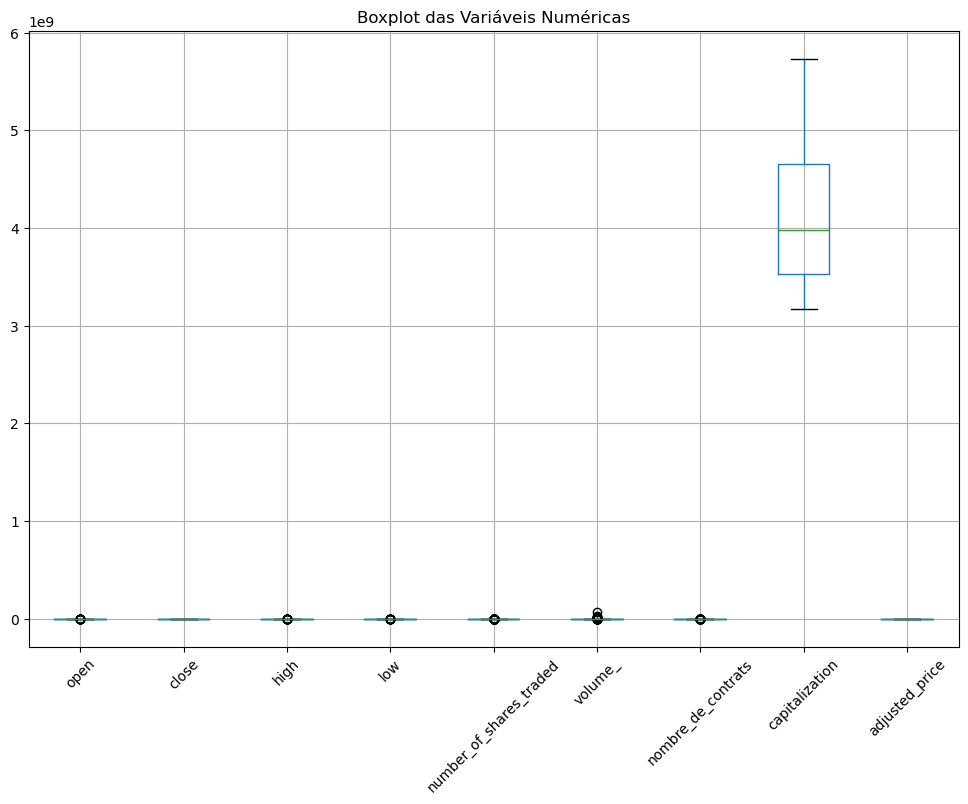

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar boxplots para as variáveis numéricas
plt.figure(figsize=(12, 8))
df[['open', 'close', 'high', 'low', 'number_of_shares_traded', 'volume_', 'nombre_de_contrats', 'capitalization', 'adjusted_price']].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot das Variáveis Numéricas')
plt.show()


In [17]:
# Função para detectar outliers com base no IQR
def detectar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

# Verificar outliers para as principais variáveis numéricas
for coluna in ['open', 'close', 'high', 'low', 'number_of_shares_traded', 'volume_', 'nombre_de_contrats', 'capitalization', 'adjusted_price']:
    outliers = detectar_outliers(df, coluna)
    print(f'Outliers na coluna {coluna}: {len(outliers)} encontrados')


Outliers na coluna open: 21 encontrados
Outliers na coluna close: 0 encontrados
Outliers na coluna high: 21 encontrados
Outliers na coluna low: 21 encontrados
Outliers na coluna number_of_shares_traded: 91 encontrados
Outliers na coluna volume_: 92 encontrados
Outliers na coluna nombre_de_contrats: 53 encontrados
Outliers na coluna capitalization: 0 encontrados
Outliers na coluna adjusted_price: 0 encontrados


### Vou fazer criar resumos estatisticos e decidir se tratamos ou nao - POR SE TRATAR DE VALORES DE AÇÕES DEVO ANALISAR COM CUIDADO ESSA QUESTÃO

In [19]:
# Gerar resumo estatístico das colunas com outliers
colunas_outliers = ['open', 'high', 'low', 'number_of_shares_traded', 'volume_', 'nombre_de_contrats']

for coluna in colunas_outliers:
    resumo = df[coluna].describe()
    print(f"\nResumo estatístico da coluna {coluna}:")
    print(resumo)



Resumo estatístico da coluna open:
count    750.000000
mean      79.986013
std       19.123349
min        0.000000
25%       69.992500
50%       78.355000
75%       92.577500
max      114.800000
Name: open, dtype: float64

Resumo estatístico da coluna high:
count    750.000000
mean      80.571280
std       19.254408
min        0.000000
25%       70.350000
50%       79.075000
75%       92.967500
max      114.950000
Name: high, dtype: float64

Resumo estatístico da coluna low:
count    750.000000
mean      79.038507
std       18.962954
min        0.000000
25%       68.850000
50%       77.000000
75%       91.500000
max      112.900000
Name: low, dtype: float64

Resumo estatístico da coluna number_of_shares_traded:
count       750.000000
mean       8786.866667
std       31987.857054
min           0.000000
25%         130.000000
50%        1122.000000
75%        5842.000000
max      679920.000000
Name: number_of_shares_traded, dtype: float64

Resumo estatístico da coluna volume_:
count    

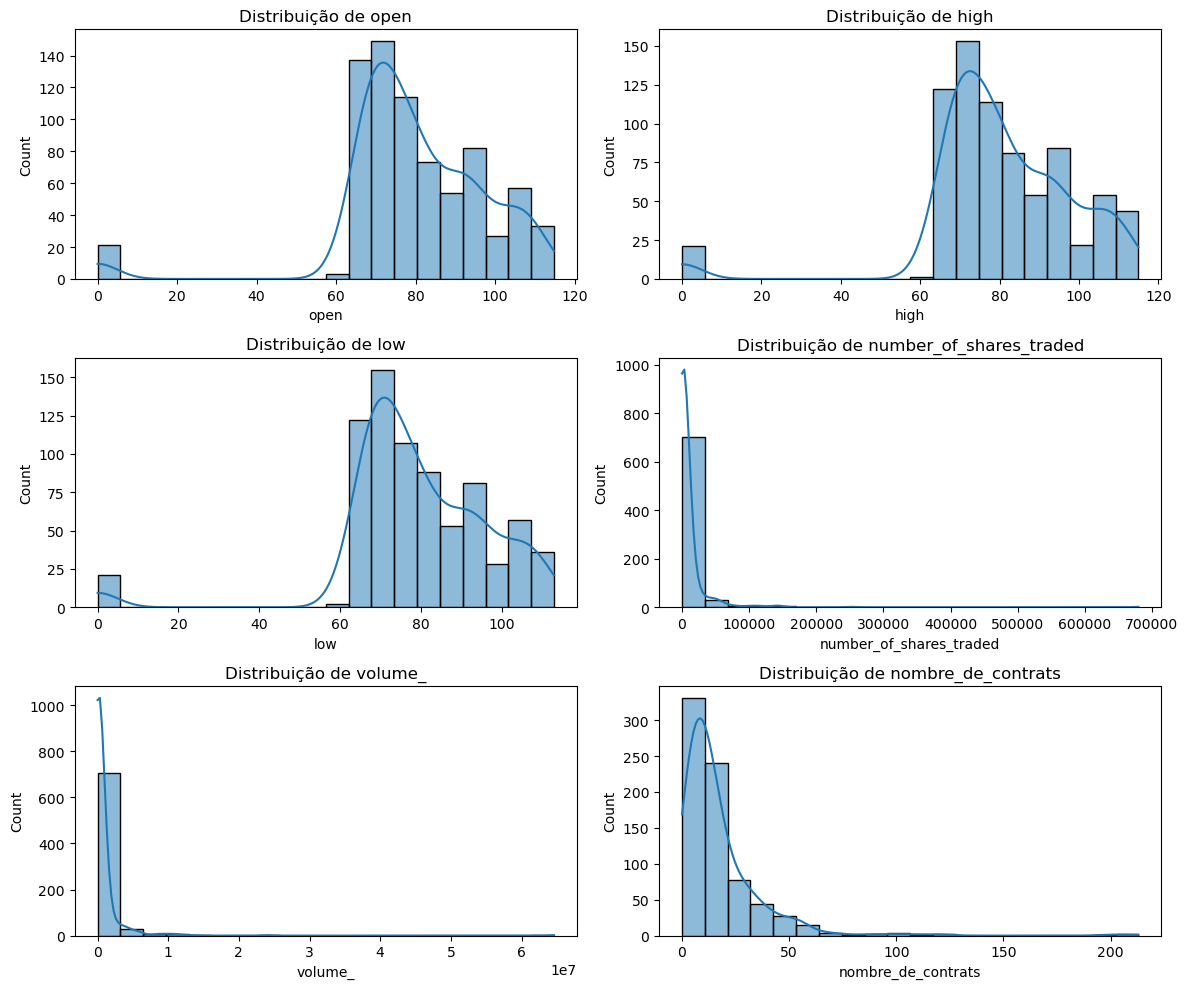

In [20]:
import matplotlib.pyplot as plt

# Plotar histogramas para as colunas com outliers
plt.figure(figsize=(12, 10))

for i, coluna in enumerate(colunas_outliers, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[coluna], bins=20, kde=True)
    plt.title(f"Distribuição de {coluna}")
    plt.xlabel(coluna)

plt.tight_layout()
plt.show()


Os valores de 0 nas colunas open, high, low, number_of_shares_traded, e volume_ parecem ser potenciais outliers. É importante avaliar se esses zeros são erros de dados ou representam dias sem atividade.

In [22]:
# resolvi manter os dados no dataset usando a mediana para nao perder informações.

In [23]:
# Preencher os valores zero com a mediana nas colunas relevantes
colunas_para_preencher = ['open', 'high', 'low', 'number_of_shares_traded', 'volume_']
for coluna in colunas_para_preencher:
    df[coluna] = df[coluna].replace(0, df[coluna].median())

# Verificar se ainda há valores zero
(df == 0).sum()


date                       0
open                       0
close                      0
high                       0
low                        0
number_of_shares_traded    0
volume_                    0
nombre_de_contrats         3
capitalization             0
adjusted_price             0
dtype: int64

In [24]:
# Preencher os valores ausentes na coluna 'nombre_de_contrats' com a mediana
df['nombre_de_contrats'].fillna(df['nombre_de_contrats'].median(), inplace=True)

# Verificar se ainda restam valores nulos no dataset
df.isnull().sum()


date                       0
open                       0
close                      0
high                       0
low                        0
number_of_shares_traded    0
volume_                    0
nombre_de_contrats         0
capitalization             0
adjusted_price             0
dtype: int64

08:23:35 - cmdstanpy - INFO - Chain [1] start processing
08:23:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 921.843950639987
Mean Absolute Error (MAE): 29.151709064207914
R² Score: -12.574141099456533


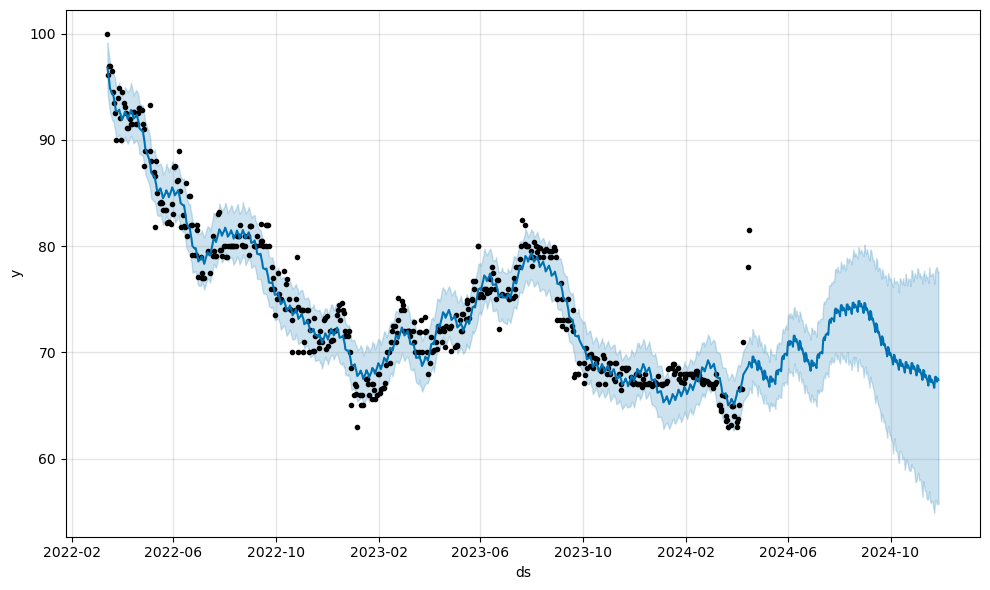

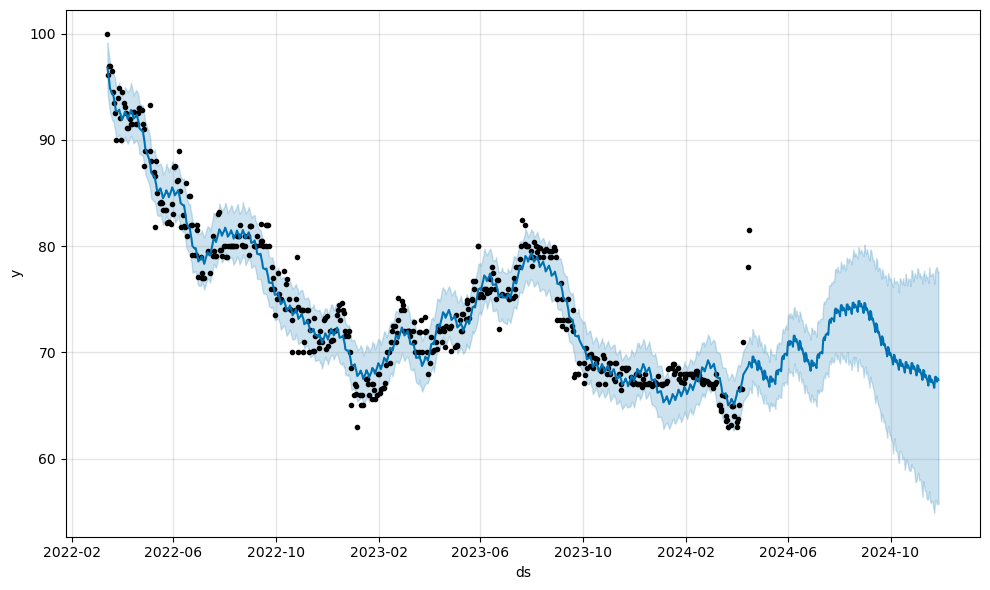

In [27]:
from prophet import Prophet  # Alterado para o novo nome da biblioteca
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preparar os dados no formato que o Prophet espera (colunas 'ds' e 'y')
df_prophet = df[['date', 'close']].copy()
df_prophet.columns = ['ds', 'y']  # Prophet exige essas colunas ('ds' para data, 'y' para valores)

# Dividir os dados em treino e teste
train_size = int(len(df_prophet) * 0.7)
df_train = df_prophet[:train_size]
df_test = df_prophet[train_size:]

# Criar o modelo Prophet
model = Prophet()

# Treinar o modelo
model.fit(df_train)

# Fazer previsões (para o mesmo período do conjunto de teste)
future = model.make_future_dataframe(periods=len(df_test))
forecast = model.predict(future)

# Pegar as previsões para o período de teste
y_pred = forecast['yhat'].tail(len(df_test))

# Avaliar o modelo
mse = mean_squared_error(df_test['y'], y_pred)
mae = mean_absolute_error(df_test['y'], y_pred)
r2 = r2_score(df_test['y'], y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Visualizar o forecast
model.plot(forecast)


In [28]:
# tivemos PÉSSIMOS RESULTADOS ACIMA

In [29]:
# AGORA IREI FAZER DECOMPOSIÇÃO DOS DADOS PARA USAR O PROPHET

Como aplicar a decomposição de séries temporais:
Aqui está o código para decompor a série temporal em seus componentes:

In [31]:
# Verificar as colunas do dataframe
print(df.columns)


Index(['date', 'open', 'close', 'high', 'low', 'number_of_shares_traded',
       'volume_', 'nombre_de_contrats', 'capitalization', 'adjusted_price'],
      dtype='object')


In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Converter a coluna 'date' para o tipo datetime (se ainda não foi feito)
df['date'] = pd.to_datetime(df['date'])

# Decompor a série temporal sem definir 'date' como índice
decomposition = seasonal_decompose(df['close'], model='additive', period=30)  # Ajuste o período conforme necessário

# Extrair os componentes
df['trend'] = decomposition.trend  # Coeficientes de tendência
df['seasonal'] = decomposition.seasonal  # Coeficientes sazonais
df['residual'] = decomposition.resid  # Coeficientes de resíduos

# Remover valores nulos gerados pela decomposição
df.dropna(inplace=True)

# Exibir as primeiras linhas para análise
df[['date', 'trend', 'seasonal', 'residual']].head()



,date,trend,seasonal,residual
15,2024-03-21,66.048667,0.384598,-2.833265
16,2024-03-20,65.623667,0.006786,-2.130453
17,2024-03-19,65.377833,0.116578,-1.494411
18,2024-03-18,65.328333,0.161626,0.400041
19,2024-03-15,65.353000,-0.539742,1.176742


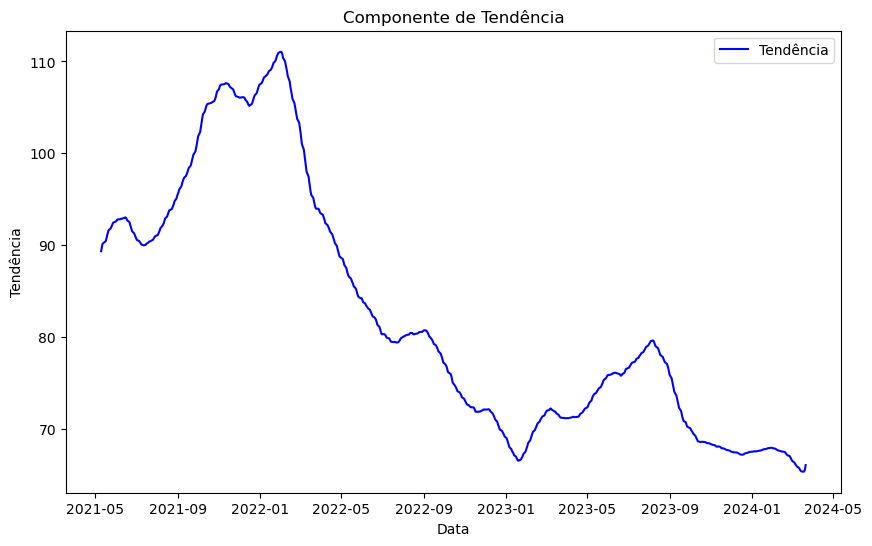

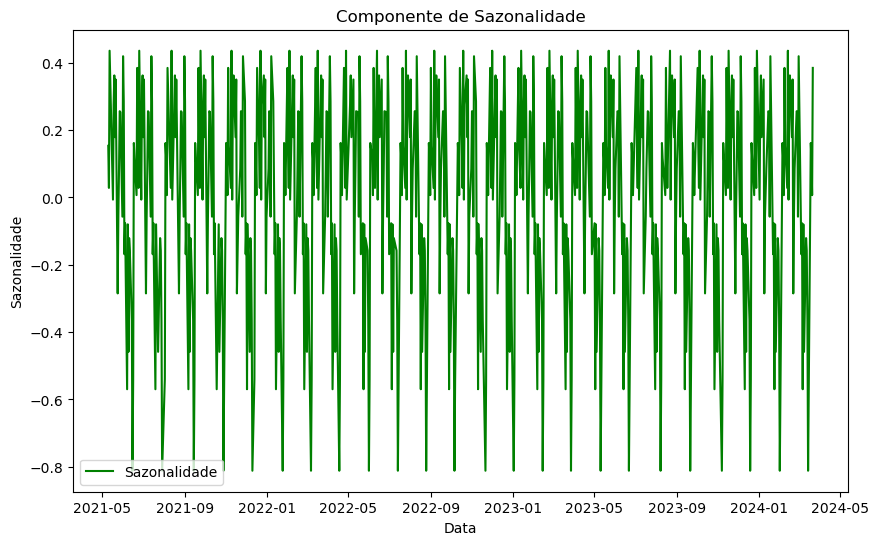

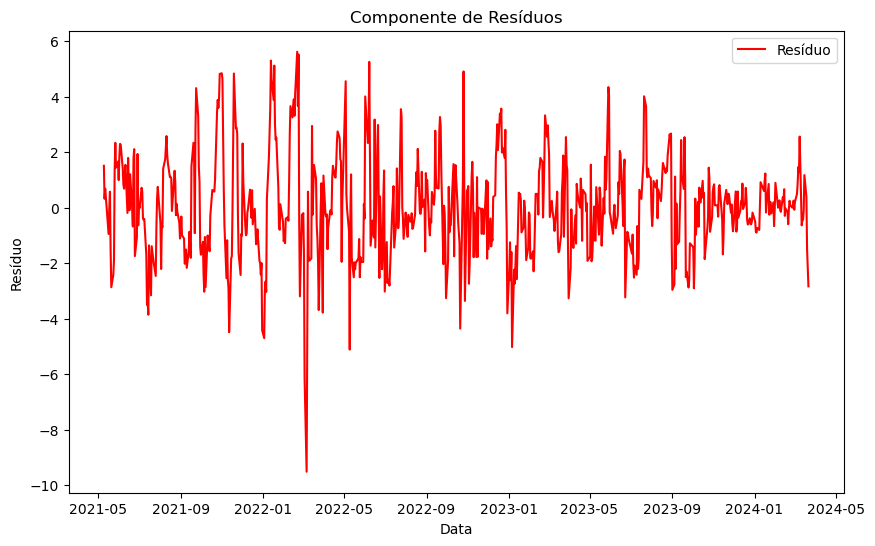

In [33]:
import matplotlib.pyplot as plt

# Plotar a tendência
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['trend'], label='Tendência', color='blue')
plt.title('Componente de Tendência')
plt.xlabel('Data')
plt.ylabel('Tendência')
plt.legend()
plt.show()

# Plotar a sazonalidade
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['seasonal'], label='Sazonalidade', color='green')
plt.title('Componente de Sazonalidade')
plt.xlabel('Data')
plt.ylabel('Sazonalidade')
plt.legend()
plt.show()

# Plotar os resíduos
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['residual'], label='Resíduo', color='red')
plt.title('Componente de Resíduos')
plt.xlabel('Data')
plt.ylabel('Resíduo')
plt.legend()
plt.show()


In [34]:
# agora vamos a teste dos residuos

In [35]:
from scipy.stats import shapiro

# Remover nulos nos resíduos antes de realizar o teste
residuals = df['residual'].dropna()

# Aplicar o teste de Shapiro-Wilk para verificar a normalidade dos resíduos
stat, p_value = shapiro(residuals)

# Exibir os resultados
print(f'Estatística do Shapiro-Wilk: {stat}')
print(f'Valor-p: {p_value}')

# Avaliação do resultado
if p_value > 0.05:
    print("Os resíduos seguem uma distribuição normal.")
else:
    print("Os resíduos não seguem uma distribuição normal.")


Estatística do Shapiro-Wilk: 0.9826769870024312
Valor-p: 1.6032376802821083e-07
Os resíduos não seguem uma distribuição normal.


08:23:37 - cmdstanpy - INFO - Chain [1] start processing
08:23:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 1262.9469314518476
Mean Absolute Error (MAE): 34.83513990942699
R² Score: -21.8653864041259


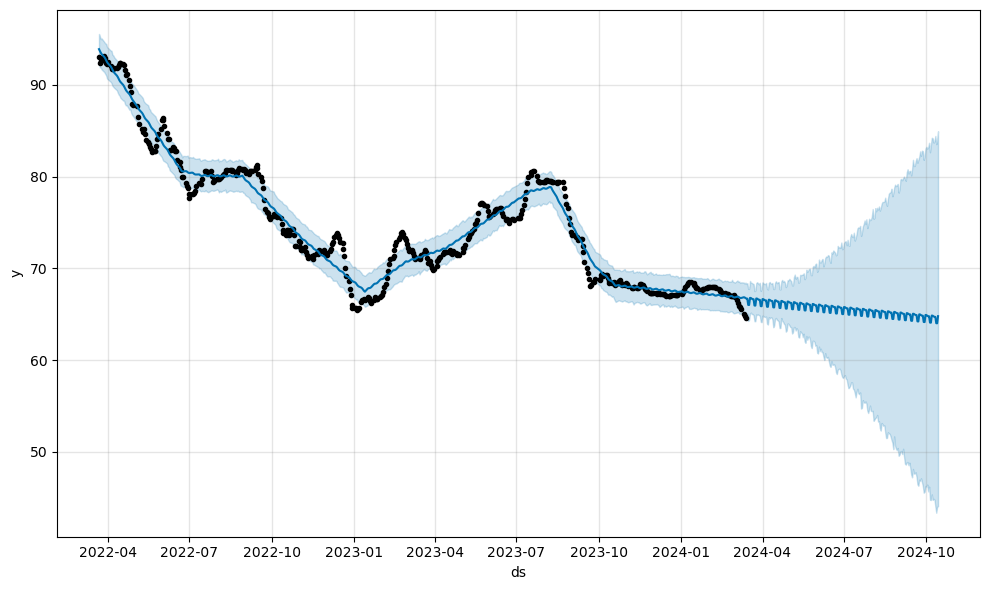

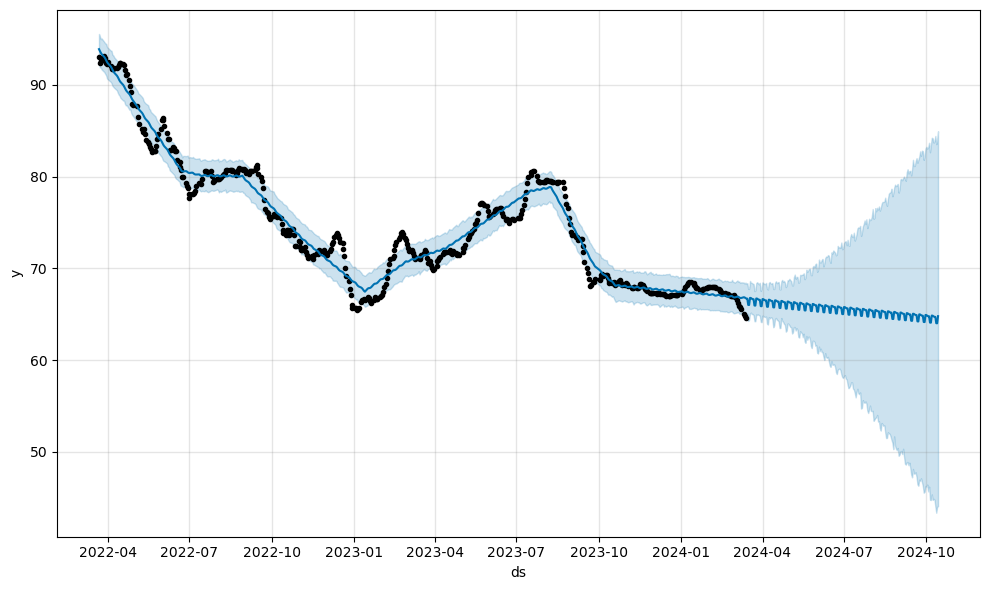

In [36]:
import pandas as pd
from prophet import Prophet

# Aplicar média móvel de 7 dias para suavizar a série
df['close_smooth'] = df['close'].rolling(window=7).mean()

# Remover os valores nulos gerados pela suavização
df.dropna(subset=['close_smooth'], inplace=True)

# Preparar os dados no formato que o Prophet espera (colunas 'ds' e 'y')
df_prophet = df[['date', 'close_smooth']].copy()
df_prophet.columns = ['ds', 'y']  # Prophet exige essas colunas ('ds' para data, 'y' para valores)

# Dividir os dados em treino e teste
train_size = int(len(df_prophet) * 0.7)
df_train = df_prophet[:train_size]
df_test = df_prophet[train_size:]

# Criar o modelo Prophet
model = Prophet()

# Treinar o modelo
model.fit(df_train)

# Fazer previsões (para o mesmo período do conjunto de teste)
future = model.make_future_dataframe(periods=len(df_test))
forecast = model.predict(future)

# Pegar as previsões para o período de teste
y_pred = forecast['yhat'].tail(len(df_test))

# Avaliar o modelo
mse = mean_squared_error(df_test['y'], y_pred)
mae = mean_absolute_error(df_test['y'], y_pred)
r2 = r2_score(df_test['y'], y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Visualizar o forecast
model.plot(forecast)


In [37]:
# vamos INICIAR XGBOOST parametros 16 lags, media movel 3 e previsão 01 dia

In [38]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Adicionar 16 lags e uma média móvel de 3 dias
for i in range(1, 17):
    df[f'lag_{i}'] = df['close'].shift(i)

df['media_movel_3'] = df['close'].rolling(window=3).mean()  # Média móvel de 3 dias

# Remover linhas com valores nulos causados pelos lags e médias móveis
df.dropna(inplace=True)

# Selecionar as colunas de lags e a média móvel de 3 dias como features
X = df[[f'lag_{i}' for i in range(1, 17)] + ['media_movel_3']]
y = df['close']

# Definir o modelo XGBoost
model = XGBRegressor(random_state=42)

# Função para validação Walk-Forward
def walk_forward_validation(data, n_train, n_test):
    n_records = len(data)
    mse_scores = []
    mae_scores = []
    r2_scores = []

    # Validação incremental
    for i in range(n_train, n_records - n_test, n_test):
        # Definir os conjuntos de treino e teste
        X_train, X_test = X[:i], X[i:i+n_test]
        y_train, y_test = y[:i], y[i:i+n_test]
        
        # Treinar o modelo em cada janela de dados
        model.fit(X_train, y_train)
        
        # Fazer previsões
        y_pred = model.predict(X_test)
        
        # Avaliar o modelo
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Armazenar as métricas
        mse_scores.append(mse)
        mae_scores.append(mae)
        r2_scores.append(r2)
    
    return np.mean(mse_scores), np.mean(mae_scores), np.mean(r2_scores)

# Aplicar a Walk-Forward Validation
n_train = int(len(df) * 0.8)  # 80% dos dados para treino
n_test = int(len(df) * 0.2)   # 20% para validação a cada etapa

mse, mae, r2 = walk_forward_validation(df, n_train, n_test)

# Exibir os resultados médios
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 3.6721618910954614
Mean Absolute Error (MAE): 1.584535074577057
R² Score: 0.9234556071738926


In [39]:
# abaixo teste de validação dessa série temporal

In [40]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Função para validar usando Walk-Forward Validation
def walk_forward_validation(data, n_train, n_test):
    X = data[[f'lag_{i}' for i in range(1, 17)] + ['media_movel_3']]
    y = data['close']
    
    n_records = len(data)
    mse_scores = []
    mae_scores = []
    r2_scores = []

    # Validação incremental
    for i in range(n_train, n_records - n_test, n_test):
        # Definir os conjuntos de treino e teste
        X_train, X_test = X[:i], X[i:i+n_test]
        y_train, y_test = y[:i], y[i:i+n_test]
        
        # Definir o modelo XGBoost
        model = XGBRegressor(random_state=42)
        
        # Treinar o modelo em cada janela de dados
        model.fit(X_train, y_train)
        
        # Fazer previsões
        y_pred = model.predict(X_test)
        
        # Avaliar o modelo
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Armazenar as métricas
        mse_scores.append(mse)
        mae_scores.append(mae)
        r2_scores.append(r2)
    
    # Retornar a média dos resultados
    return np.mean(mse_scores), np.mean(mae_scores), np.mean(r2_scores)

# Aplicar a Walk-Forward Validation
n_train = int(len(df) * 0.8)  # 80% dos dados para treino
n_test = int(len(df) * 0.2)   # 20% para validação a cada etapa

# Executar a validação
mse, mae, r2 = walk_forward_validation(df, n_train, n_test)

# Exibir os resultados médios
print(f"Walk-Forward Validation Mean Squared Error (MSE): {mse}")
print(f"Walk-Forward Validation Mean Absolute Error (MAE): {mae}")
print(f"Walk-Forward Validation R² Score: {r2}")


Walk-Forward Validation Mean Squared Error (MSE): 3.6721618910954614
Walk-Forward Validation Mean Absolute Error (MAE): 1.584535074577057
Walk-Forward Validation R² Score: 0.9234556071738926


# Relatório Final: Previsão de Preços das Ações da Empresa AUTO HAUL

## Introdução
Este projeto teve como objetivo prever os preços das ações da empresa AUTO HAUL utilizando modelos de séries temporais. O foco foi a previsão do preço de fechamento para o próximo dia, com o uso de lags, médias móveis e o algoritmo XGBoost. Após várias iterações, ajustes de hiperparâmetros e validações, obtivemos um modelo robusto e consistente.

## Metodologia

### 1. **Preprocessamento dos Dados**
- **Dataset**: Os dados históricos de preços das ações foram utilizados, contendo colunas como `open`, `close`, `high`, `low`, e volume de negociações.
- **Lags**: Foram criadas colunas de lags (valores anteriores) para capturar padrões históricos de até **16 dias** anteriores.
- **Média Móvel**: Uma média móvel de **3 dias** foi usada para suavizar as flutuações diárias e capturar tendências recentes.

### 2. **Modelo**
- O modelo escolhido foi o **XGBoost**, conhecido por sua alta performance em dados estruturados.
- Diversos hiperparâmetros foram ajustados ao longo do projeto, incluindo o número de lags, profundidade máxima das árvores, taxa de aprendizado (`learning_rate`), e regularizações (L1 e L2).

### 3. **Validação**
- A validação do modelo foi feita utilizando a abordagem de **Walk-Forward Validation**, que respeita a natureza temporal dos dados, garantindo uma avaliação robusta.
- Usamos uma divisão de **80% dos dados para treino** e **20% para teste**, repetindo a validação em diferentes janelas temporais.

## Resultados

### 1. **Métricas de Desempenho (Walk-Forward Validation)**
- **Mean Squared Error (MSE)**: 3.67
- **Mean Absolute Error (MAE)**: 1.58
- **R² Score**: 0.923

### 2. **Interpretação**
- O **MSE** e **MAE** indicam que o modelo tem erros baixos nas previsões, com o valor médio de erro absoluto sendo apenas 1.58 unidades em relação ao preço real.
- O **R² Score** de 0.923 mostra que o modelo é capaz de explicar **92.3% da variabilidade** dos dados, o que é um excelente desempenho em termos de precisão para previsões de séries temporais.

## Conclusão
O modelo final com **16 lags** e uma **média móvel de 3 dias** apresentou resultados muito consistentes, sendo capaz de prever os preços das ações da empresa AUTO HAUL com alta precisão. A abordagem de **Walk-Forward Validation** garantiu que o modelo fosse testado de forma robusta em diferentes janelas temporais, e os resultados mostram que o modelo generaliza bem para novos dados.

### Próximos Passos
1. **Deploy do Modelo**: O modelo está pronto para ser salvo e utilizado para previsões contínuas.
2. **Monitoramento**: Em um ambiente de produção, seria útil monitorar o desempenho do modelo ao longo do tempo para garantir que ele continue apresentando bons resultados com novos dados.

## Agradecimentos
Agradecemos a oportunidade de desenvolver este projeto e estamos satisfeitos com os resultados obtidos. O modelo de previsão desenvolvido pode ser uma ferramenta valiosa para a empresa na tomada de decisões informadas sobre os preços de suas ações.
